In [1]:
"""感知机随机梯度下降算法实现
"""
def perceptron_sgd(X, Y, alpha, epochs):
    """
    参数:
    X -- 自变量数据矩阵
    Y -- 因变量数据矩阵
    alpha -- lamda 参数
    epochs -- 迭代次数

    返回:
    w -- 权重系数
    b -- 截距项
    """
    w = np.zeros(len(X[0])) # 初始化参数为 0
    b = np.zeros(1)
    
    for t in range(epochs): # 迭代
        for i, x in enumerate(X):
            if ((np.dot(X[i], w)+b)*Y[i]) <= 0: # 判断条件
                w = w + alpha*X[i]*Y[i] # 更新参数
                b = b + alpha*Y[i]

    return w, b

In [2]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/course-12-data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
"""加载数据集
"""
import pandas as pd

df = pd.read_csv("course-12-data.csv", header=0) # 加载数据集
df.head() # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,-1
1,4.9,3.0,-1
2,4.7,3.2,-1
3,4.6,3.1,-1
4,5.0,3.6,-1


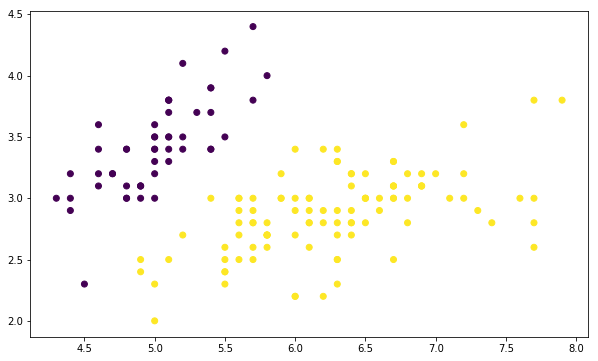

In [4]:
"""绘制数据集
"""
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df['X0'],df['X1'], c=df['Y'])

In [5]:
import numpy as np

X = df[['X0','X1']].values
Y = df['Y'].values

alpha = 0.1
epochs = 150

perceptron_sgd(X, Y, alpha, epochs)

(array([ 4.93, -6.98]), array([-3.3]))

In [6]:
L = perceptron_sgd(X, Y, alpha, epochs)
w1 = L[0][0]
w2 = L[0][1]
b = L[1]

z = np.dot(X, np.array([w1, w2]).T) + b
np.sign(z)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [7]:
from sklearn.metrics import accuracy_score

accuracy_score(Y, np.sign(z))

0.9866666666666667

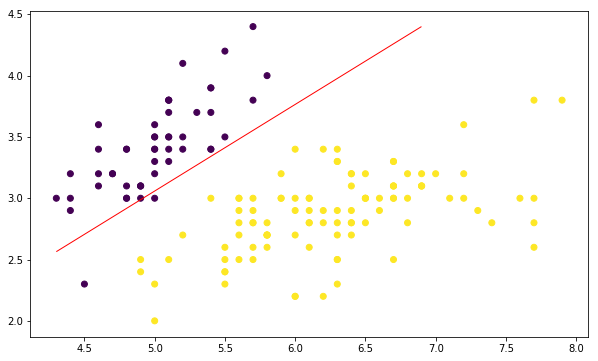

In [8]:
# 绘制轮廓线图，不需要掌握
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'],df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max(),
x2_min, x2_max = df['X1'].min(), df['X1'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[0][0], L[0][1]]).T) + L[1]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0], linewidths=1, colors='red');

In [9]:
"""计算每次迭代后的损失函数值
"""
def perceptron_loss(X, Y, alpha, epochs):
    
    """
    参数:
    X -- 自变量数据矩阵
    Y -- 因变量数据矩阵
    alpha -- lamda 参数
    epochs -- 迭代次数

    返回:
    loss_list -- 每次迭代损失函数值列表
    """
    
    w = np.zeros(len(X[0])) # 初始化参数为 0
    b = np.zeros(1)
    loss_list = []
    
    for t in range(epochs): # 迭代
        loss_init = 0
        for i, x in enumerate(X):
            if ((np.dot(X[i], w)+b)*Y[i]) <= 0: # 判断条件
                loss_init += (((np.dot(X[i], w)+b)*Y[i]))
                w = w + alpha*X[i]*Y[i] # 更新参数
                b = b + alpha*Y[i]
        loss_list.append(loss_init * -1)
    
    return loss_list

Text(0,0.5,'Loss function')

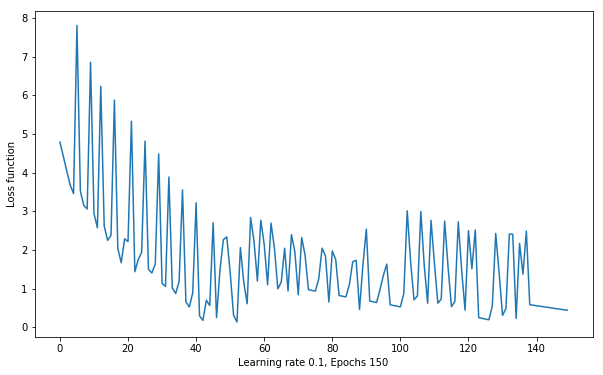

In [10]:
loss_list = perceptron_loss(X, Y, alpha, epochs)

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel("Learning rate {}, Epochs {}".format(alpha, epochs))
plt.ylabel("Loss function")

Text(0,0.5,'Loss function')

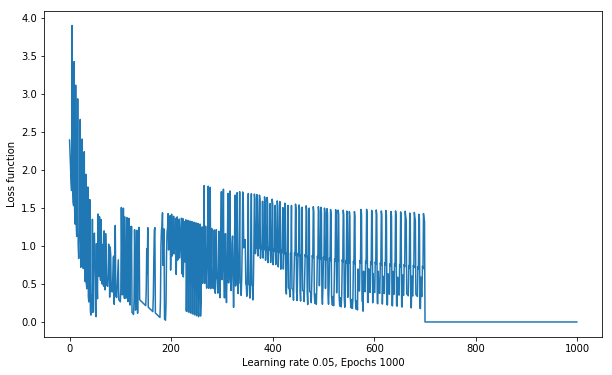

In [11]:
alpha = 0.05 # 减小学习率
epochs = 1000 # 增加迭代次数

loss_list = perceptron_loss(X, Y, alpha, epochs)

plt.figure(figsize=(10, 6))
plt.plot([i for i in range(len(loss_list))], loss_list)
plt.xlabel("Learning rate {}, Epochs {}".format(alpha, epochs))
plt.ylabel("Loss function")

In [12]:
L = perceptron_sgd(X, Y, alpha, epochs)
z = np.dot(X, L[0].T) + L[1]
accuracy_score(Y, np.sign(z))

1.0

In [13]:
# sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# sigmoid 函数求导
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [14]:
# 示例样本
X = np.array([[1, 1]])
y = np.array([[1]])

X, y

(array([[1, 1]]), array([[1]]))

In [15]:
W1 = np.random.rand(2, 3)
W2 = np.random.rand(3, 1)

W1, W2

(array([[0.09659847, 0.21648878, 0.19994224],
        [0.23014337, 0.75578482, 0.52994307]]), array([[0.79351005],
        [0.5476215 ],
        [0.62105588]]))

In [16]:
input_layer = X # 输入层
hidden_layer = sigmoid(np.dot(input_layer, W1)) # 隐含层，公式 20
output_layer = sigmoid(np.dot(hidden_layer, W2)) # 输出层，公式 22

output_layer

array([[0.78200993]])

In [17]:
# 公式 24
d_W2 = np.dot(hidden_layer.T, (2 * (output_layer - y) * 
              sigmoid_derivative(np.dot(hidden_layer, W2))))

# 公式 25
d_W1 = np.dot(input_layer.T,  (
       np.dot(2 * (output_layer - y) * sigmoid_derivative(
       np.dot(hidden_layer, W2)), W2.T) * sigmoid_derivative(np.dot(input_layer, W1))))

d_W2, d_W1

(array([[-0.04317842],
        [-0.05392578],
        [-0.05015081]]), array([[-0.01435714, -0.0081041 , -0.01012945],
        [-0.01435714, -0.0081041 , -0.01012945]]))

In [18]:
# 梯度下降更新权重, 学习率为 0.05

W1 -= 0.05 * d_W1 # 如果上面是 y - output_layer，则改成 +=
W2 -= 0.05 * d_W2

d_W2, d_W1

(array([[-0.04317842],
        [-0.05392578],
        [-0.05015081]]), array([[-0.01435714, -0.0081041 , -0.01012945],
        [-0.01435714, -0.0081041 , -0.01012945]]))

In [19]:
# 示例神经网络完整实现
class NeuralNetwork:
    
    # 初始化参数
    def __init__(self, X, y, lr):
        self.input_layer = X
        self.W1 = np.random.rand(self.input_layer.shape[1], 3)
        self.W2 = np.random.rand(3, 1)
        self.y = y
        self.lr = lr
        self.output_layer = np.zeros(self.y.shape)
    
    # 前向传播
    def forward(self):
        self.hidden_layer = sigmoid(np.dot(self.input_layer, self.W1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.W2))
    
    # 反向传播
    def backward(self):
        d_W2 = np.dot(self.hidden_layer.T, (2 * (self.output_layer - self.y) *
                      sigmoid_derivative(np.dot(self.hidden_layer, self.W2))))
        
        d_W1 = np.dot(self.input_layer.T, (
               np.dot(2 * (self.output_layer - self.y) * sigmoid_derivative(
               np.dot(self.hidden_layer, self.W2)), self.W2.T) * sigmoid_derivative(
               np.dot(self.input_layer, self.W1))))
        
        # 参数更新
        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2

In [20]:
X = df[['X0','X1']].values # 输入值
y = df['Y'].values.reshape(len(X), -1) # 真实 y，处理成 [[],...,[]] 形状

final loss: 133.35698207918227


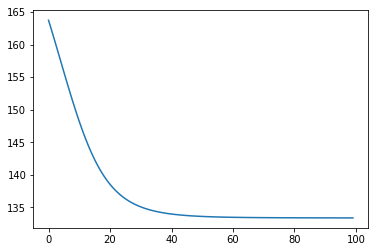

In [21]:
nn = NeuralNetwork(X, y, lr=0.001) # 定义模型
loss_list = [] # 存放损失数值变化

for i in range(100):
    nn.forward() # 前向传播
    nn.backward() # 反向传播
    loss = np.sum((y - nn.output_layer) ** 2) # 计算平方损失
    loss_list.append(loss)

print("final loss:", loss)
plt.plot(loss_list) # 绘制 loss 曲线变化图